# Introduction - Welcome To YouTube Data Analytics Project
YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform.

Done By: BBenjamin

## Business Task
In this project we will use Youtube Data on some channels go gain insight by:
1. Perfoming a sentiment analysis, to see how users feel about certain vidoes and to visualize what positive and negative words are used the most by users.
2. Performing a category analysis to see what catogory of vidoes are liked the most by users and create recommendations based on that.

## Data Source
Data used here can be downloaded from [Kaggle](https://www.kaggle.com/datasets/datasnaek/youtube-new)

This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for the US, GB, DE, CA, and FR regions (USA, Great Britain, Germany, Canada, and France, respectively), with up to 200 listed trending videos per day.


## Performing Sentiment Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
directory = os.getcwd()
print(directory)

/Users/benjaminbusilana


In [71]:
path = directory + "/Datasets/ytData/UScomments.csv"
comments = pd.read_csv(path,error_bad_lines=False)

/Users/benjaminbusilana/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/Users/benjaminbusilana/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [72]:
#Check for the overview of the data, load the first 10 observations

comments.head(10)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0


In [11]:
#check for any missing values
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [12]:
#since we only have 25 missing values we can drop them
comments.dropna(inplace=True)

In [13]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [14]:
#Install the Textblob module for the sentiment analysis
!pip install textblob

     |████████████████████████████████| 636 kB 2.7 MB/s eta 0:00:01


In [16]:
from textblob import TextBlob

In [37]:
#test polarity of one comment in the dataset
TextBlob("trending 😉").sentiment.polarity

0.0

In [76]:
df = comments[0:10000]

In [77]:
#Get the polarity of all the comments in the dataset using a forloop wrapped in a try clause
polarity = []
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [78]:
polarity[0:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573]

In [79]:
#Add Polarity to the dataset
comments['polarity'] = polarity

In [80]:
#View polarity in the dataset
comments.head(15)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [50]:
#Filter positive comments(polarity of 1)
positive_comments = comments[comments['polarity'] == 1]

In [51]:
positive_comments.head(10)

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
325,sjlHnJvXdQs,This is awesome. 1:20 XDDDDDDDDD,0,0,1.0
416,cMKX2tE5Luk,BEST MOVIE EVER!!!,0,0,1.0
433,cMKX2tE5Luk,Power is the disease. Care is the cure. Keep...,0,0,1.0
447,cMKX2tE5Luk,The greatest movie about the greatest movie.,0,0,1.0
469,cMKX2tE5Luk,It's Harry guys he's Spiderman best friend,0,0,1.0


In [52]:
negative_comments = comments[comments['polarity'] == -1]

In [53]:
negative_comments.head(10)

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
1932,-Ifnaxi2LQg,this is the worst thing i've heard. ever.,0,0,-1.0
2043,B7YaMkCl3XA,Economy is horrible in Cuba. It's going to be ...,0,0,-1.0
2088,B7YaMkCl3XA,Sub to me if this is terrible,0,1,-1.0
2192,5ywKal6-anc,PATHETIC,1,0,-1.0
2410,EVp4-qjWVJE,I don't like this sportscaster sounds very an...,0,0,-1.0


In [55]:
from wordcloud import WordCloud, STOPWORDS

In [58]:
negative_comments['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [59]:
total_comments = ' '.join(negative_comments['comment_text'])

In [60]:
total_comments[0: 100]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! "

(-0.5, 399.5, 199.5, -0.5)

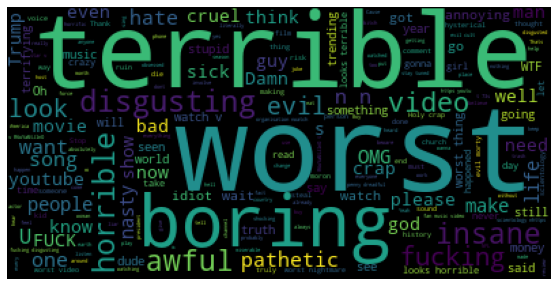

In [63]:
#Visualize most negative words used.(WordCloud)
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

### Observation:
Based on the above analysis and visualization we can see that the most common negative words words used in comments are terrible, worst, boring, awful and others. This can be used to track which videos the users did not like and this can lead to knowing its content and decide if it was good for upload, then those videos may not be recommended to others.

In [64]:
total_comments_positive = ' '.join(positive_comments['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

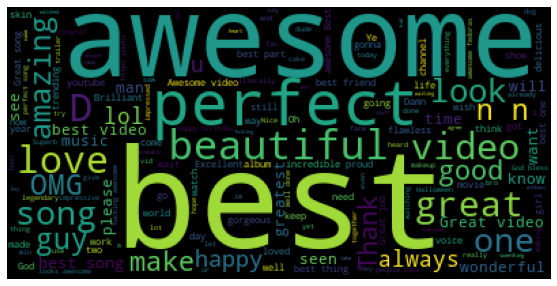

In [65]:
#Visualize most positive words used.(WordCloud)
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

### Observation:
Based on the analysis above we can see that the most positive words used in commens are awesome, best, perfect, beautiful love and others, these can be used to find what vidoes can be recommended to more users in increase views.

## Performing Category Analysis

In [93]:
#file organization of all the video datasets for further analysis.
second_path = directory + "/Datasets/ytData/additional_data"

In [94]:
files = os.listdir(second_path)

In [95]:
files

['MXvideos.csv',
 '.DS_Store',
 'INvideos.csv',
 'DEvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'CAvideos.csv',
 'RUvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'GBvideos.csv']

In [98]:
full_df = pd.DataFrame()
for file in files:
    current_df = pd.read_csv(second_path+'/'+file,encoding="iso-8859-1",error_bad_lines=False)
    
    current_df['country']= file.split('.')[0][0:2]
    full_df = pd.concat([full_df, current_df])

In [100]:
full_df.head(6)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,Unnamed: 0,107},{1241,734}}\t#/;R_klmno
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24.0,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130.0,4182.0,361.0,...,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,MX,NaN,NaN,NaN,NaN
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22.0,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972.0,271.0,174.0,...,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,MX,NaN,NaN,NaN,NaN
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25.0,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064.0,10105.0,266.0,...,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,MX,NaN,NaN,NaN,NaN
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25.0,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153.0,378.0,171.0,...,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,MX,NaN,NaN,NaN,NaN
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26.0,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965.0,57781.0,681.0,...,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,MX,NaN,NaN,NaN,NaN
5,Q9kK6NWZR1U,17.14.11,Asi se sintio Terremoto en iraq al bordo de ir...,MÃSICA & ENTRETENIMIENTO,10.0,2017-11-12T20:17:38.000Z,[none],129645.0,506.0,67.0,...,https://i.ytimg.com/vi/Q9kK6NWZR1U/default.jpg,False,False,False,Un fuerte sismo ha afectado en la noche de est...,MX,NaN,NaN,NaN,NaN


In [101]:
full_df.shape

(375943, 21)

In [104]:
#Analyse Which Video Category Is Liked the Most
#Extract unique values
full_df['category_id'].unique()

array([24., 22., 25., 26., 10., 23., 17.,  2.,  1., 29., 27., 28., 20.,
       15., 19., 43., nan, 30., 44.])

In [135]:
#Loading the category file
category_path = directory + "/Datasets/ytData/category_file.txt"

In [139]:
#Proper data organization and formatting and Merging two datasets.
category_df = pd.read_csv(category_path,sep= ':')

In [140]:
category_df.reset_index(inplace=True)

In [141]:
category_df

,index,Category_id Category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [142]:
category_df.columns=['category_id', 'Category_name']

In [143]:
category_df.set_index('category_id',inplace=True)

In [144]:
#Convert to dictionary
dictionary = category_df.to_dict()

In [145]:
dictionary['Category_name']

{1: ' Film & Animation',
 2: ' Autos & Vehicles',
 10: ' Music',
 15: ' Pets & Animals',
 17: ' Sports',
 18: ' Short Movies',
 19: ' Travel & Events',
 20: ' Gaming',
 21: ' Videoblogging',
 22: ' People & Blogs',
 23: ' Comedy',
 24: ' Entertainment',
 25: ' News & Politics',
 26: ' Howto & Style',
 27: ' Education',
 28: ' Science & Technology',
 29: ' Nonprofits & Activism',
 30: ' Movies',
 31: ' Anime/Animation',
 32: ' Action/Adventure',
 33: ' Classics',
 34: ' Comedy',
 35: ' Documentary',
 36: ' Drama',
 37: ' Family',
 38: ' Foreign',
 39: ' Horror',
 40: ' Sci-Fi/Fantasy',
 41: ' Thriller',
 42: ' Shorts',
 43: ' Shows',
 44: ' Trailers            '}

In [149]:
full_df['category_name'] = full_df['category_id'].map(dictionary['Category_name'])

In [150]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'Unnamed: 0',
       ' 107}', ' {1241', ' 734}}\t#/;R_klmno', 'category_name'],
      dtype='object')

In [151]:
full_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,country,Unnamed: 0,107},{1241,734}}\t#/;R_klmno,category_name
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24.0,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130.0,4182.0,361.0,...,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,MX,NaN,NaN,NaN,NaN,Entertainment
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22.0,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972.0,271.0,174.0,...,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,MX,NaN,NaN,NaN,NaN,People & Blogs
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25.0,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064.0,10105.0,266.0,...,False,False,False,La canciÃ³n del principio se llama âEste esp...,MX,NaN,NaN,NaN,NaN,News & Politics


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Entertainment'),
  Text(1, 0, ' People & Blogs'),
  Text(2, 0, ' News & Politics'),
  Text(3, 0, ' Howto & Style'),
  Text(4, 0, ' Music'),
  Text(5, 0, ' Comedy'),
  Text(6, 0, ' Sports'),
  Text(7, 0, ' Autos & Vehicles'),
  Text(8, 0, ' Film & Animation'),
  Text(9, 0, ' Nonprofits & Activism'),
  Text(10, 0, ' Education'),
  Text(11, 0, ' Science & Technology'),
  Text(12, 0, ' Gaming'),
  Text(13, 0, ' Pets & Animals'),
  Text(14, 0, ' Travel & Events'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

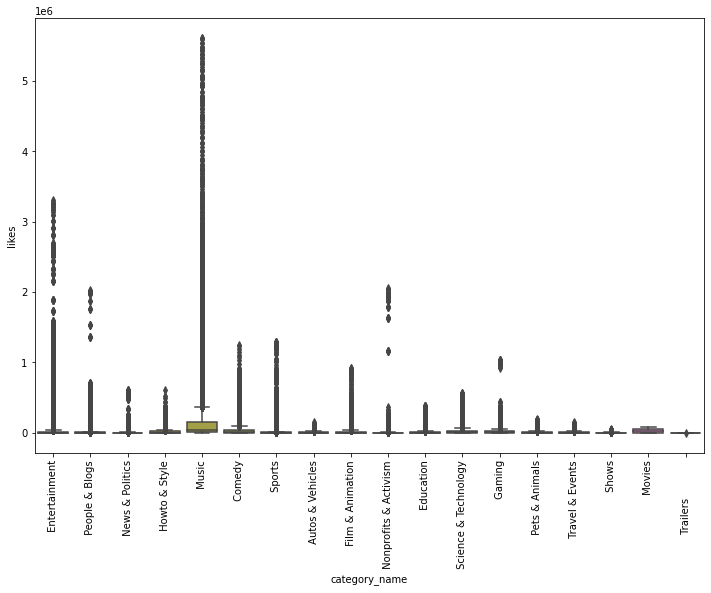

In [153]:
#Visualization of our Data.
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name', y='likes', data=full_df)
plt.xticks(rotation = "vertical")

# Observation:

From this graph we can see that videos related to music have the most likes followed by entertainement. Videos related to shows and trailers do not have that many likes. This can be used by youtubers to see what content they need to focus on in order to have their videos watched by many. This can also be used to determine what category of vidoes can be recommended more.

Thank you for checking out my youtube project hope you liked it.